In [ ]:
# Loads the dataset from Kaggle
# Step1: Create a new API token from Kaggle account and Run the below block of Code

from google.colab import files 
files.upload() 

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"victorolatunji","key":"59ab91ede42f6c6f2d4b12cc882532ef"}'}

In [ ]:
# Install Kaggle API client 
!pip install -q kaggle

In [ ]:
# Please note MY created kaggle token is name kaggle1, your might be different

# Make a dir for kaggle folder 
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/ 

# Run the below code to avoid warning
!chmod 600 ~/.kaggle/kaggle.json 

In [ ]:
# Create Dataset folder
!mkdir -p traffic_dataset
%cd traffic_dataset 

/content/traffic_dataset


In [ ]:
# Find the dataset on Kaggle
!kaggle datasets list 

ref                                                                title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
themrityunjaypathak/covid-cases-and-deaths-worldwide               Covid Cases and Deaths WorldWide                  8KB  2023-02-01 12:22:51           8278        266  1.0              
amaanansari09/top-100-songs                                        Top 100 songs                                     6KB  2023-02-16 18:55:35           1942         70  1.0              
datascientistanna/customers-dataset                                Shop Customer Data                               23KB  2023-02-07 18:42:21           6665        153  1.0              
thedevastator/airbnb-prices-in-european-cities                   

In [ ]:
# Download Dataset 
!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34          76898        931  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11           9835        243  1.0              
eunjurho/german-traffic-sign-recognition-benchmark-cropped         german_traffic_sign_recognition_benchmark_cropped  206MB  2019-11-10 15:22:13            351          8  0.75             
ibrahimkaratas/gtsrb-german-traffic-sign-recogniti

In [ ]:
# Download Traffic datasets
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
%cd .. 

 98% 599M/612M [00:04<00:00, 130MB/s]
100% 612M/612M [00:04<00:00, 132MB/s]
/content


In [ ]:
# Unzipping the Dataset 
!unzip traffic_dataset/gtsrb-german-traffic-sign.zip -d traffic_dataset
!rm traffic_dataset/gtsrb-german-traffic-sign.zip 
!rm -rf traffic_dataset/Meta
!rm -rf traffic_dataset/meta
!rm -rf traffic_dataset/test 
!rm -rf traffic_dataset/train
!rm traffic_dataset/Meta.csv 

Streaming output truncated to the last 5000 lines.
  inflating: traffic_dataset/train/5/00005_00053_00010.png  
  inflating: traffic_dataset/train/5/00005_00053_00011.png  
  inflating: traffic_dataset/train/5/00005_00053_00012.png  
  inflating: traffic_dataset/train/5/00005_00053_00013.png  
  inflating: traffic_dataset/train/5/00005_00053_00014.png  
  inflating: traffic_dataset/train/5/00005_00053_00015.png  
  inflating: traffic_dataset/train/5/00005_00053_00016.png  
  inflating: traffic_dataset/train/5/00005_00053_00017.png  
  inflating: traffic_dataset/train/5/00005_00053_00018.png  
  inflating: traffic_dataset/train/5/00005_00053_00019.png  
  inflating: traffic_dataset/train/5/00005_00053_00020.png  
  inflating: traffic_dataset/train/5/00005_00053_00021.png  
  inflating: traffic_dataset/train/5/00005_00053_00022.png  
  inflating: traffic_dataset/train/5/00005_00053_00023.png  
  inflating: traffic_dataset/train/5/00005_00053_00024.png  
  inflating: traffic_dataset/train

In [ ]:
# Import Required Libraries 
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.image import imread 
from PIL import Image
import random 
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

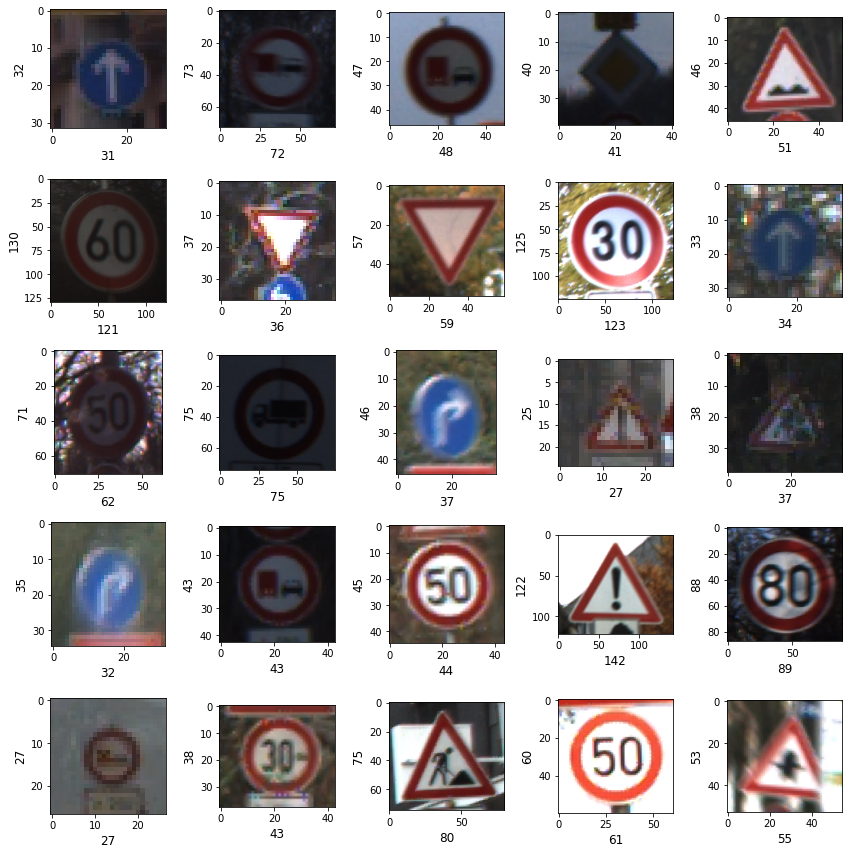

In [ ]:
# Data Visualization 


plt.figure(figsize=(12,12))
path = "traffic_dataset/Test"
for image in range (1, 26):
  plt.subplot(5,5,image)
  plt.tight_layout()
  rand_image = imread(path + "/" + random.choice(sorted(os.listdir(path)))) 
  plt.imshow(rand_image) 
  plt.xlabel(rand_image.shape[1], fontsize =12)
  plt.ylabel(rand_image.shape[0], fontsize =12)  

**Data visualization of the traffic sign shows the dimentions are uneven, hence we have to find the mean size to resize the image uniformly**

In [ ]:
dim1 = []
dim2 = []

for val in range (0, 43):
  path = "traffic_dataset/Train"
  labels = path + "/{0}".format(val)
  image_path = os.listdir(labels)
  for x in image_path:
    img = imread(labels + "/" + x)
    dim1.append(img.shape[0])
    dim2.append(img.shape[1]) 

In [ ]:
# Lets print the mean dimention of the images
print("Mean dimention of dm1:", np.mean(dim1), "AND Mean dimention of dm2:", np.mean(dim2))

Mean dimention of dm1: 50.328929582493814 AND Mean dimention of dm2: 50.83587951745773


**Now, we can conclude that the images is 50 BY 50 size **

In [ ]:
images = []
labels_id = []
for i in range(43):
  labels = 'traffic_dataset/Train' + '/{0}'.format(i)
  image_path = os.listdir(labels)
  for x in image_path:
      img = Image.open(labels + '/' + x)
      img = img.resize((50,50))
      img = np.array(img)
      images.append(img)
      labels_id.append(i)
    

In [ ]:
# Converting the images to Numpy 

images = np.array(images)

# Images pixel ranges from 0 to 255 hence normalize the hence mean divide the array by 255

images = images/255

In [ ]:
# Repeats same steps for labels_id

labels_id = np.array(labels_id)
labels_id.shape

(39209,)

In [ ]:
print("images shape:", images.shape) 

images shape: (39209, 50, 50, 3)


**This reveal 10320 images, with 50 by 50 size and 3 represent the color channel (RGB)**

In [ ]:
# Visuaize the class of label count 
label_counts = pd.DataFrame(labels_id).value_counts()
label_counts.head() # Real the 42 classes in the train dataset and number of counts

2     2250
1     2220
13    2160
12    2100
38    2070
dtype: int64

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(images, labels_id, test_size =20, random_state=42)

In [ ]:
# Use Hot one Encoding to avoid priotization of the Target class
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

In [ ]:
# Model Artchitecture 
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size=(3,3), input_shape= x_train.shape[1:],activation="relu", padding="same"))
model.add(MaxPool2D(pool_size =(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(filters = 64, kernel_size=(3,3), activation="relu", padding="same"))
model.add(MaxPool2D(pool_size =(2,2)))
model.add(Dropout(0.5))



model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=43, activation="softmax")) # Outter Layer 

In [ ]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics = ["accuracy"])
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 64)        0

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=32,validation_data=(x_val, y_val), verbose=2)  

Epoch 1/10
1225/1225 - 330s - loss: 1.6172 - accuracy: 0.5273 - val_loss: 0.6153 - val_accuracy: 0.8500 - 330s/epoch - 269ms/step
Epoch 2/10
1225/1225 - 323s - loss: 0.6467 - accuracy: 0.7923 - val_loss: 0.2305 - val_accuracy: 0.9500 - 323s/epoch - 263ms/step
Epoch 3/10
1225/1225 - 321s - loss: 0.4519 - accuracy: 0.8531 - val_loss: 0.1985 - val_accuracy: 0.9500 - 321s/epoch - 262ms/step
Epoch 4/10
1225/1225 - 320s - loss: 0.3657 - accuracy: 0.8819 - val_loss: 0.1645 - val_accuracy: 0.9500 - 320s/epoch - 261ms/step
Epoch 5/10
1225/1225 - 318s - loss: 0.3000 - accuracy: 0.9027 - val_loss: 0.1461 - val_accuracy: 0.9500 - 318s/epoch - 259ms/step
Epoch 6/10
1225/1225 - 318s - loss: 0.2530 - accuracy: 0.9184 - val_loss: 0.1495 - val_accuracy: 0.9500 - 318s/epoch - 260ms/step
Epoch 7/10
1225/1225 - 319s - loss: 0.2278 - accuracy: 0.9270 - val_loss: 0.1725 - val_accuracy: 0.9500 - 319s/epoch - 260ms/step
Epoch 8/10
1225/1225 - 319s - loss: 0.2023 - accuracy: 0.9350 - val_loss: 0.1018 - val_acc

In [ ]:
# Evaluation and Measurement 
evaluation = pd.DataFrame(model.history.history)
evaluation[["accuracy", "val_accuracy"]].plot()
evaluation[["loss", "val_loss"]].plot()

KeyError: ignored

In [ ]:
print(evaluation)

       loss  accuracy  val_loss  val_accuracy
0  1.617208  0.527316  0.615319          0.85
1  0.646729  0.792289  0.230473          0.95
2  0.451908  0.853122  0.198489          0.95
3  0.365688  0.881855  0.164512          0.95
4  0.300023  0.902728  0.146068          0.95
5  0.252966  0.918370  0.149483          0.95
6  0.227776  0.927020  0.172464          0.95
7  0.202254  0.934982  0.101828          0.95
8  0.183140  0.941234  0.112853          0.95
9  0.172595  0.943964  0.078214          0.95


In [ ]:
test_path = 'traffic_dataset/Test'
!rm traffic_dataset/Test/GT-final_test.csv

In [ ]:
#defining a function that will scale images
from PIL import Image

def scaling(test_images, test_path):
    images = []

    image_path = test_images
    
    for x in image_path:
        img = Image.open(test_path + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)

    #Converting images into numpy array
    images = np.array(images)
    #The pixel value of each image ranges between 0 and 255
    #Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
    images = images/255

    return images

In [ ]:
test_images = scaling(sorted(os.listdir(test_path)),test_path)

In [ ]:
test = pd.read_csv('traffic_dataset/Test.csv')
y_test = test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10])

In [ ]:
y_pred = np.argmax(model.predict(test_images), axis=-1)
y_pred

395/395 [==============================] - 25s 64ms/step


array([16,  1, 38, ...,  3,  7, 10])

In [ ]:
# Storing all lables
all_lables = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vechiles over 3.5 metric']

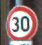

In [ ]:
# Visualize test image
img = Image.open(test_path + '/00001.png')
img

In [ ]:
# Original label
print("Original label : ",all_lables[y_test[1]])

Original label :  Speed limit (30km/h)


In [ ]:
# Predicted label
print("Predicted label : ",all_lables[y_pred[1]])

Predicted label :  Speed limit (30km/h)


**Saving model**

In [ ]:
model.save("traffic_model")